<a href="https://colab.research.google.com/github/Sparshj8287/ML_Journey/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [ ]:
#Check the labels
X,y


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
X.shape,y.shape


((1000, 2), (1000,))

In [ ]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Y":y})

In [ ]:
circles


,X0,X1,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


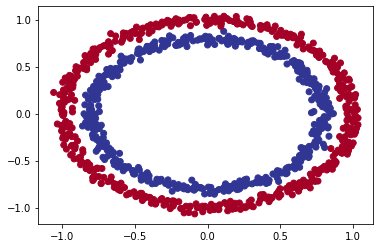

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
len(X)

1000

In [ ]:
X.size

2000

In [ ]:
import tensorflow as tf


In [ ]:
#1.Create the model 
model_1=tf.keras.Sequential([
  tf.keras.layers.Dense(2)
  
])
#2.Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#3.Fit the model
model_1.fit(X,y,epochs=100,verbose=0)

In [ ]:
circles["Y"].value_counts()

1    500
0    500
Name: Y, dtype: int64

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 2.3541 - accuracy: 0.5210


[2.3541419506073, 0.5210000276565552]

###Note: Those parameters which are changeable are called hyper parameters


In [ ]:
tf.random.set_seed(42)
#1.Create the model 
model_2=tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
  
])
#2.Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#3.Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


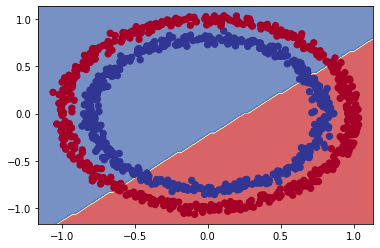

In [ ]:
plot_decision_boundary(model=model_2,
                       X=X,
                       y=y)

In [ ]:
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5)

In [ ]:
X_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [ ]:
X_regression[:150],tf.size(y_regression)

(<tf.Tensor: shape=(150,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=200>)

In [ ]:
tf.size(X_regression)

<tf.Tensor: shape=(), dtype=int32, numpy=200>

In [ ]:
#Now we split our regression
X_reg_train=X_regression[:150]
y_reg_train=y_regression[:150]
X_reg_test=X_regression[150:]
y_reg_test=y_regression[150:]

In [ ]:
#Now we create our linear regression problem model
tf.random.set_seed(42)
#Create a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="linear"),
    #tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation="linear")
])
#Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"])
#Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=766,verbose=1)

Epoch 1/766


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


5/5 [==============================] - 1s 4ms/step - loss: 325.8240 - mae: 325.8240
Epoch 2/766
5/5 [==============================] - 0s 3ms/step - loss: 300.7822 - mae: 300.7822
Epoch 3/766
5/5 [==============================] - 0s 4ms/step - loss: 274.8768 - mae: 274.8768
Epoch 4/766
5/5 [==============================] - 0s 5ms/step - loss: 246.3942 - mae: 246.3942
Epoch 5/766
5/5 [==============================] - 0s 5ms/step - loss: 215.3396 - mae: 215.3396
Epoch 6/766
5/5 [==============================] - 0s 5ms/step - loss: 180.5879 - mae: 180.5879
Epoch 7/766
5/5 [==============================] - 0s 5ms/step - loss: 143.4930 - mae: 143.4930
Epoch 8/766
5/5 [==============================] - 0s 3ms/step - loss: 103.9941 - mae: 103.9941
Epoch 9/766
5/5 [==============================] - 0s 3ms/step - loss: 62.8560 - mae: 62.8560
Epoch 10/766
5/5 [==============================] - 0s 4ms/step - loss: 42.1928 - mae: 42.1928
Epoch 11/766
5/5 [==============================] - 0s 

In [ ]:
model_3.evaluate(X_reg_test,y_reg_test)

2/2 [==============================] - 0s 9ms/step - loss: 5.9520 - mae: 5.9520


[5.952041149139404, 5.952041149139404]

In [ ]:
model_3.predict(y_reg_test)

array([[ 944.1985 ],
       [ 949.16504],
       [ 954.1316 ],
       [ 959.09814],
       [ 964.06464],
       [ 969.03125],
       [ 973.99774],
       [ 978.96436],
       [ 983.93085],
       [ 988.89746],
       [ 993.86395],
       [ 998.8305 ],
       [1003.79706],
       [1008.7636 ],
       [1013.7301 ],
       [1018.6967 ],
       [1023.6632 ],
       [1028.6298 ],
       [1033.5963 ],
       [1038.5629 ],
       [1043.5294 ],
       [1048.496  ],
       [1053.4625 ],
       [1058.4291 ],
       [1063.3956 ],
       [1068.3622 ],
       [1073.3287 ],
       [1078.2953 ],
       [1083.2618 ],
       [1088.2284 ],
       [1093.1948 ],
       [1098.1615 ],
       [1103.1279 ],
       [1108.0946 ],
       [1113.061  ],
       [1118.0276 ],
       [1122.9941 ],
       [1127.9607 ],
       [1132.9272 ],
       [1137.8938 ],
       [1142.8604 ],
       [1147.8269 ],
       [1152.7935 ],
       [1157.7599 ],
       [1162.7266 ],
       [1167.693  ],
       [1172.6597 ],
       [1177.

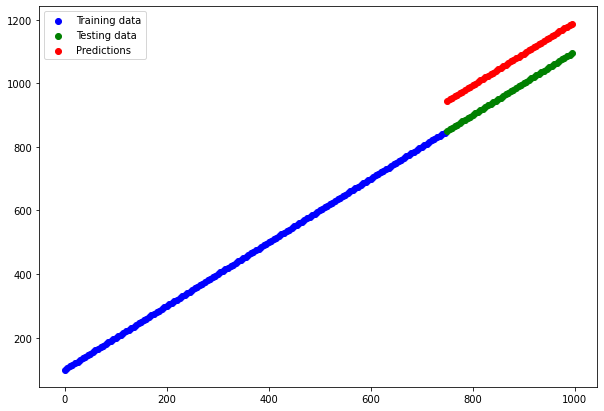

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.3804 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.2279 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7024 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 2.4002 - accuracy: 0.5000
Epoch 11/

doing binary classifcation...


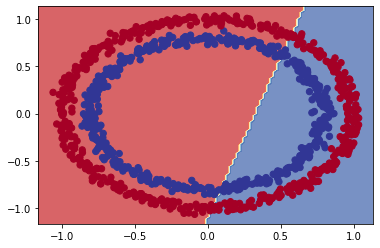

In [ ]:
plot_decision_boundary(model=model_4,X=X,y=y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

doing binary classifcation...


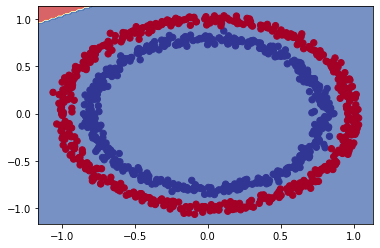

In [ ]:
plot_decision_boundary(model=model_5,X=X,y=y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(5,activation="relu"), # output layer 
  tf.keras.layers.Dense(1)
])


# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/500
32/32 [==============================] - 1s 1ms/step - loss: 4.6347 - accuracy: 0.5000
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 3.3922 - accuracy: 0.5000
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 2.7150 - accuracy: 0.5000
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 2.4508 - accuracy: 0.5000
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 1.3059 - accuracy: 0.5000
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 1.0146 - accuracy: 0.4970
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.9900 - accuracy: 0.4830
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.9682 - accuracy: 0.4570
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 0.9487 - accuracy: 0.4430
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 0.9297 - accuracy: 0.4280
Epoch 11/

doing binary classifcation...


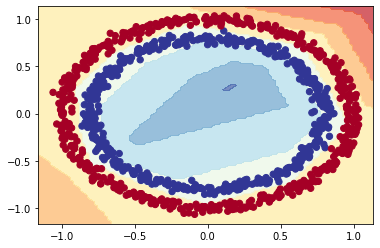

In [ ]:
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(5,activation="relu"), # output layer 
  tf.keras.layers.Dense(1,activation="sigmoid")
])


# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

# Fit the model
history = model_7.fit(X, y, epochs=100)

doing binary classifcation...


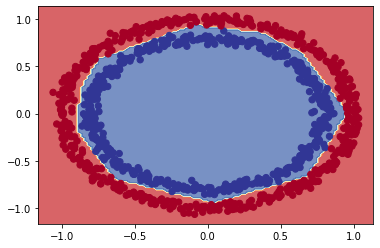

In [ ]:
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [ ]:
#Let create a toy tensor
A=tf.cast(tf.range(-10,10),tf.float32)

In [ ]:
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
#Let create sigmoid function
def sigmoid(x):
  return 1/(1+tf.exp(-x))
#Let pass our toy tensor in sigmoid function
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

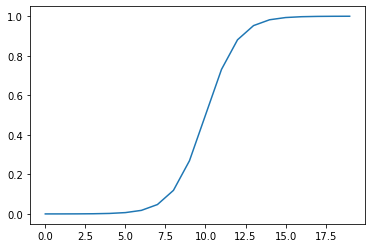

In [ ]:
plt.plot(sigmoid(A));

In [ ]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

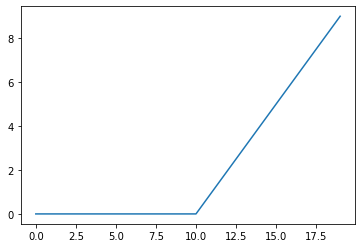

In [ ]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [ ]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [ ]:
#Beautiful let create model 8
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])
history= model_8.fit(X_train,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4837
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5475
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5625
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6087
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.6325
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.7212
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.8375
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8525
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.9187
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.9688
Epoch 11/100
25/25 [=

In [ ]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 5)                 15        
                                                                 
 dense_14 (Dense)            (None, 5)                 30        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9950


[0.010491699911653996, 0.9950000047683716]

doing binary classifcation...
doing binary classifcation...


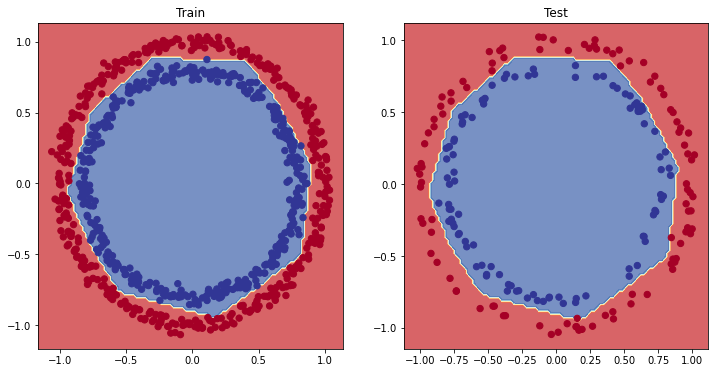

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [ ]:
#Convert history object into dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.693372,0.48375
1,0.688545,0.54750
2,0.681567,0.56250
3,0.670983,0.60875
4,0.651842,0.63250
...,...,...
95,0.016823,0.99375
96,0.010027,0.99750
97,0.008296,0.99750
98,0.010563,0.99875


<function matplotlib.pyplot.show(*args, **kw)>

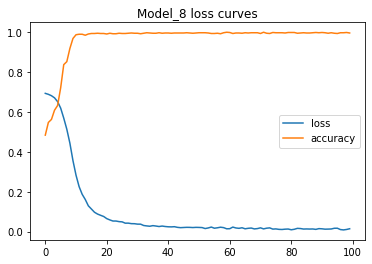

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")
plt.show

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history_9 = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler],verbose=0)

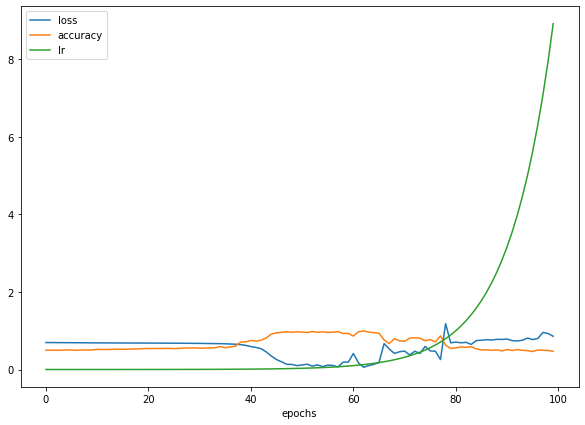

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel='epochs')

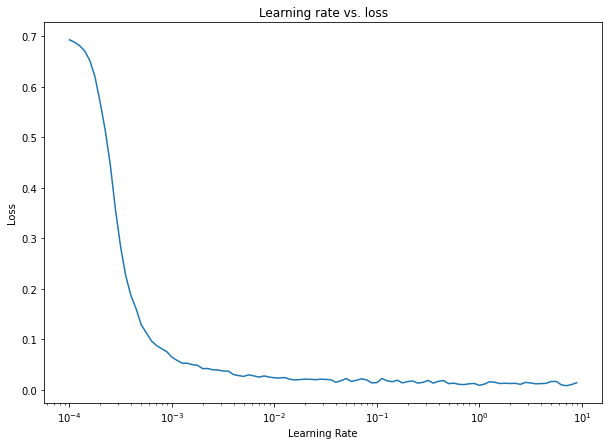

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");



In [ ]:
#Let create model 10
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.03),
                 metrics=["accuracy"])
history=model_10.fit(X_train,y_train,epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5325
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6288
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6263 - accuracy: 0.6750
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7912
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.9150
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.1771 - accuracy: 0.9862
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.9862
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 0.9837
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9925
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9987
Epoch 11/50
25/25 [===========

In [ ]:
#Let do the predictions 
y_preds=model_10.predict(X_test)

In [ ]:
#Make confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[100,   1],
       [  1,  98]])

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
def plot_confusion_matrix(a,b,classes=None):
  import itertools
  
  figsize=(20,20)
  
  # Create the confusion matrix
  cm = confusion_matrix(a, b)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]
  
  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  
  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)
  
  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.
  
  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

In [ ]:
#plot_confusion_matrix(y_test,y_preds)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [ ]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Testing sample:\n{test_data[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

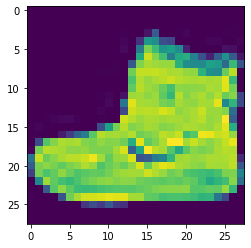

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

In [ ]:
# Plot an example image and its label
def plot_fashion_image(x):
  index_of_choice=x
  plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary) 
  plt.title(class_names[train_labels[index_of_choice]]);

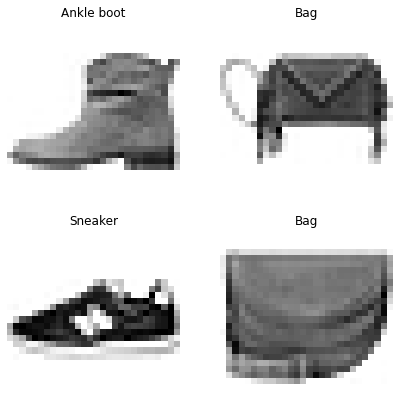

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
#Set random seed
tf.random.set_seed(42)
#Let create the model
model_11=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])
#Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
#Fit the model
history=model_11.fit(train_data,
                     train_labels,
                     epochs=10,
                     validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
#Set random seed
tf.random.set_seed(42)
#Let create the model
model_12=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])
#Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
#Fit the model
history_norm=model_12.fit(train_data_norm,
                     train_labels,
                     epochs=10,
                     validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

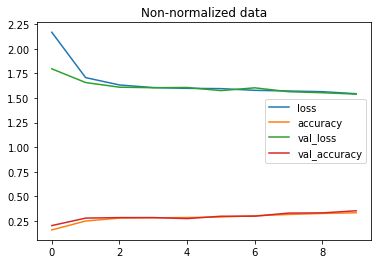

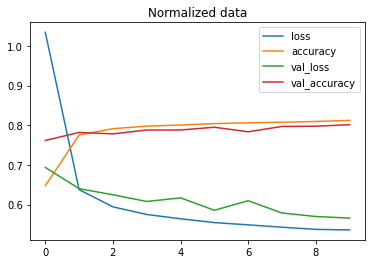

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(title='Non-normalized data')
pd.DataFrame(history_norm.history).plot(title='Normalized data')

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7058 - accuracy: 0.2488 - val_loss: 1.6514 - val_accuracy: 0.2856 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6401 - accuracy: 0.2788 - val_loss: 1.6244 - val_accuracy: 0.2739 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6185 - accuracy: 0.2823 - val_loss: 1.6034 - val_accuracy: 0.2948 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6065 - accuracy: 0.2955 - val_loss: 1.6050 - val_accuracy: 0.3221 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5908 - accuracy: 0.3097 - val_loss: 1.5778 - val_accuracy: 0.3068 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

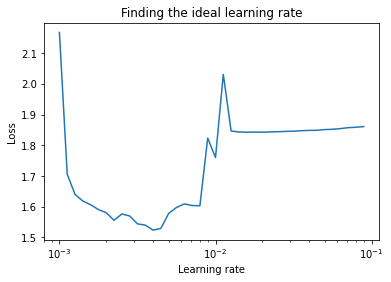

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

In [ ]:
y_probs=model_14.predict(test_data_norm)


In [ ]:
y_probs[0],tf.argmax(y_probs[0])

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_preds=y_probs.argmax(axis=1)

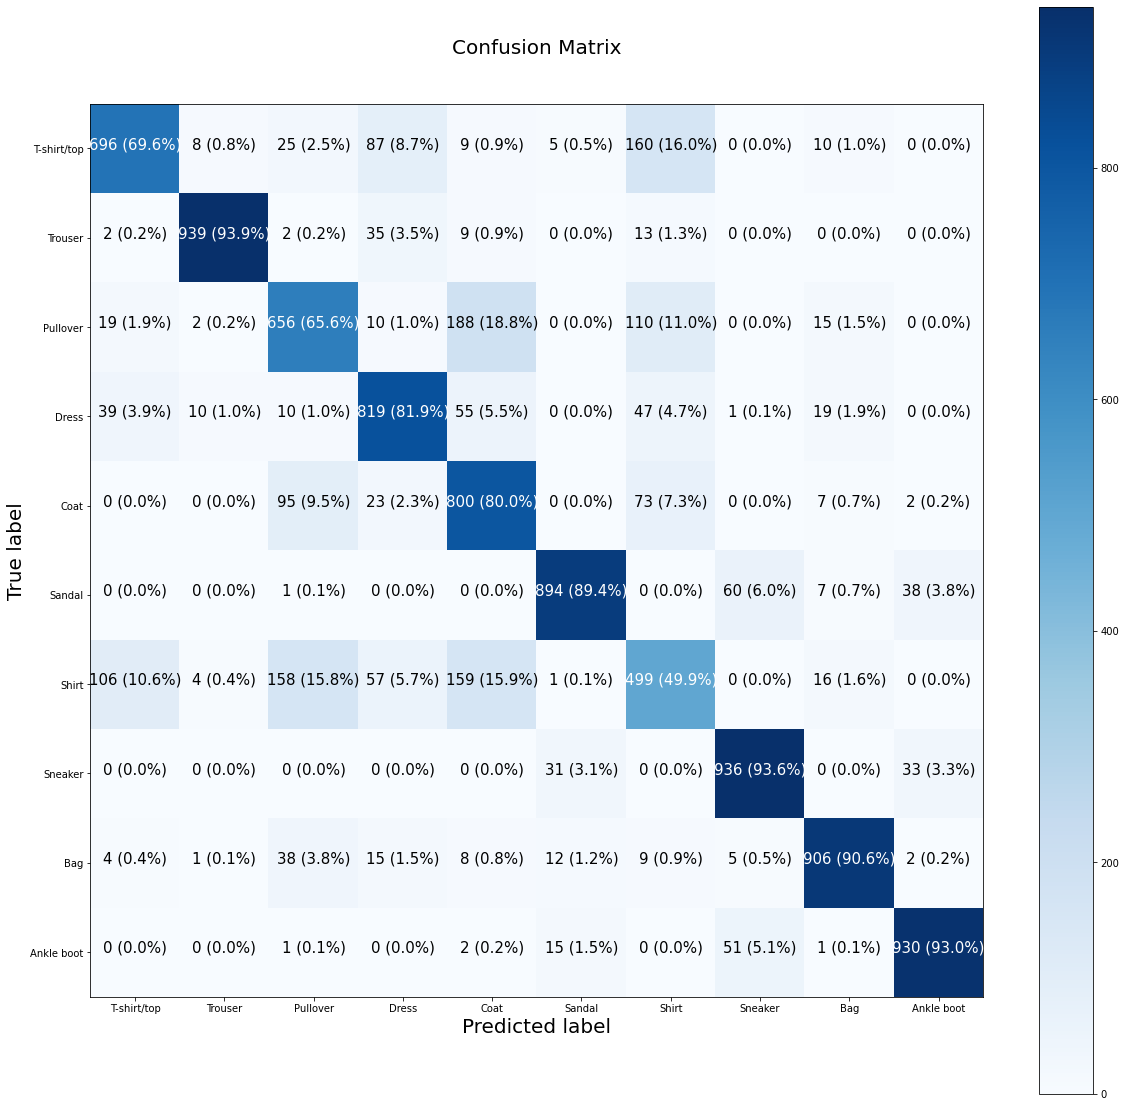

In [ ]:
plot_confusion_matrix(test_labels,y_preds,classes=class_names)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

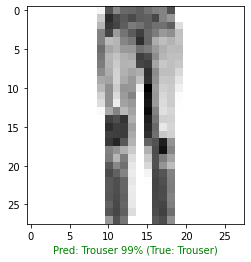

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data_norm, 
                  true_labels=test_labels, 
                  classes=class_names)